In [2]:
!pip install requests_html beautifulsoup4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


In [3]:
!pip install pandas numpy matplotlib seaborn tensorflow scikit-learn keras

In [4]:
from requests_html import HTMLSession
import pandas as pd

In [5]:
url = 'https://finance.yahoo.com/quote/AAPL/history?p=AAPL&guccounter=1&period1=1556113078&period2=1713965616'
session = HTMLSession()
r = session.get(url)

In [6]:
rows = r.html.xpath('//table/tbody/tr')
symbol = 'AAPL'
data = []
for row in rows:
    if len(row.xpath('.//td')) < 7:
        continue
    data.append({
        'Symbol':symbol,
        'Date':row.xpath('.//td[1]/text()')[0],
        'Open':row.xpath('.//td[2]/text()')[0],
        'High':row.xpath('.//td[3]/text()')[0],
        'Low':row.xpath('.//td[4]/text()')[0],
        'Close':row.xpath('.//td[5]/text()')[0],
        'Adj Close':row.xpath('.//td[6]/text()')[0],
        'Volume':row.xpath('.//td[7]/text()')[0]
    })
df = pd.DataFrame(data)

In [7]:
df.head()

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,"Apr 24, 2024",166.54,169.30,166.21,169.02,168.79,"48,251,800"
1,AAPL,"Apr 23, 2024",165.35,167.05,164.92,166.90,166.67,"49,537,800"
2,AAPL,"Apr 22, 2024",165.52,167.26,164.77,165.84,165.62,"48,116,400"
3,AAPL,"Apr 19, 2024",166.21,166.40,164.08,165.00,164.78,"67,772,100"
4,AAPL,"Apr 18, 2024",168.03,168.64,166.55,167.04,166.81,"43,122,900"


In [8]:
df.info


<bound method DataFrame.info of      Symbol          Date    Open    High     Low   Close Adj Close  \
0      AAPL  Apr 24, 2024  166.54  169.30  166.21  169.02    168.79   
1      AAPL  Apr 23, 2024  165.35  167.05  164.92  166.90    166.67   
2      AAPL  Apr 22, 2024  165.52  167.26  164.77  165.84    165.62   
3      AAPL  Apr 19, 2024  166.21  166.40  164.08  165.00    164.78   
4      AAPL  Apr 18, 2024  168.03  168.64  166.55  167.04    166.81   
...     ...           ...     ...     ...     ...     ...       ...   
1255   AAPL  Apr 30, 2019   50.76   50.85   49.78   50.17     48.23   
1256   AAPL  Apr 29, 2019   51.10   51.49   50.97   51.15     49.18   
1257   AAPL  Apr 26, 2019   51.22   51.25   50.53   51.08     49.10   
1258   AAPL  Apr 25, 2019   51.71   51.94   51.28   51.32     49.34   
1259   AAPL  Apr 24, 2019   51.84   52.12   51.76   51.79     49.79   

           Volume  
0      48,251,800  
1      49,537,800  
2      48,116,400  
3      67,772,100  
4      43,122,900  
...           ...  
1255  186,139,600  
1256   88,818,800  
1257   74,596,400  
1258   74,172,800  
1259   70,162,400  

[1260 rows x 8 columns]>

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
str_cols = ['High', 'Low', 'Close', 'Adj Close', 'Volume']
df[str_cols]=df[str_cols].replace(',', '', regex=True).astype(float)

In [11]:
df.dropna(inplace=True)

In [12]:
df = df.set_index('Date')
df.head()

,Symbol,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2024-04-24,AAPL,166.54,169.30,166.21,169.02,168.79,48251800.0
2024-04-23,AAPL,165.35,167.05,164.92,166.90,166.67,49537800.0
2024-04-22,AAPL,165.52,167.26,164.77,165.84,165.62,48116400.0
2024-04-19,AAPL,166.21,166.40,164.08,165.00,164.78,67772100.0
2024-04-18,AAPL,168.03,168.64,166.55,167.04,166.81,43122900.0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('ggplot')

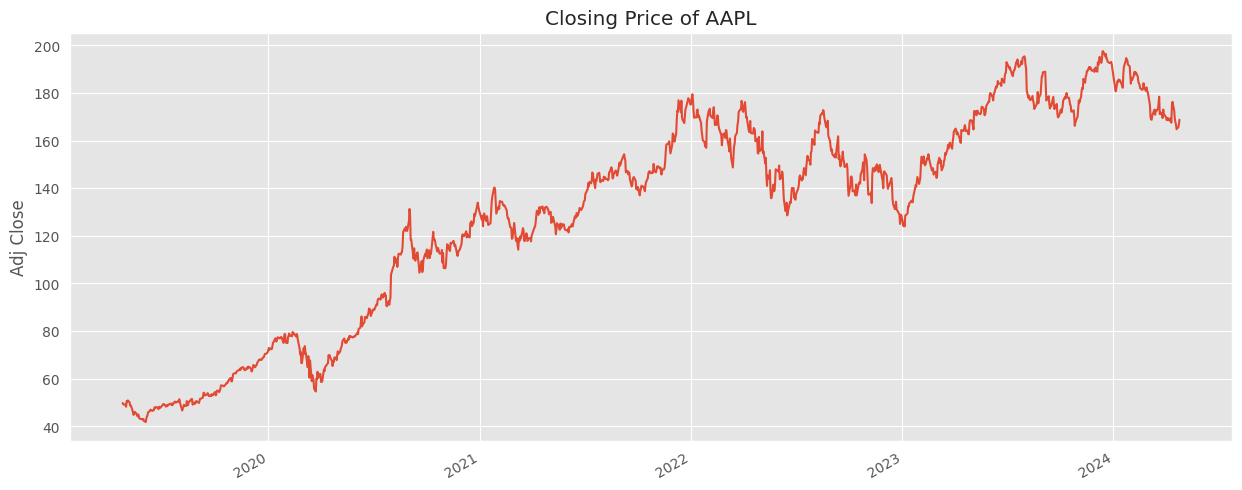

In [14]:
plt.figure(figsize=(15, 6))
df['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title('Closing Price of AAPL')
plt.show()

In [15]:
features = ['Open', 'High', 'Low', 'Volume']
y = df.filter(['Adj Close'])

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df[features])

In [18]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [19]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [20]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [21]:
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [22]:
model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
144/144 [==============================] - 4s 4ms/step - loss: 20259.5664
Epoch 2/100
144/144 [==============================] - 0s 3ms/step - loss: 19513.7207
Epoch 3/100
144/144 [==============================] - 0s 2ms/step - loss: 17618.0078
Epoch 4/100
144/144 [==============================] - 0s 2ms/step - loss: 14870.4014
Epoch 5/100
144/144 [==============================] - 0s 2ms/step - loss: 11821.1709
Epoch 6/100
144/144 [==============================] - 0s 3ms/step - loss: 8862.5205
Epoch 7/100
144/144 [==============================] - 0s 3ms/step - loss: 6251.8887
Epoch 8/100
144/144 [==============================] - 0s 3ms/step - loss: 4115.4609
Epoch 9/100
144/144 [==============================] - 0s 3ms/step - loss: 2514.4675
Epoch 10/100
144/144 [==============================] - 1s 4ms/step - loss: 1417.3329
Epoch 11/100
144/144 [==============================] - 1s 4ms/step - loss: 739.6438
Epoch 12/100
144/144 [==============================] - 1s 

In [23]:
y_pred= model.predict(X_test)

4/4 [==============================] - 0s 5ms/step


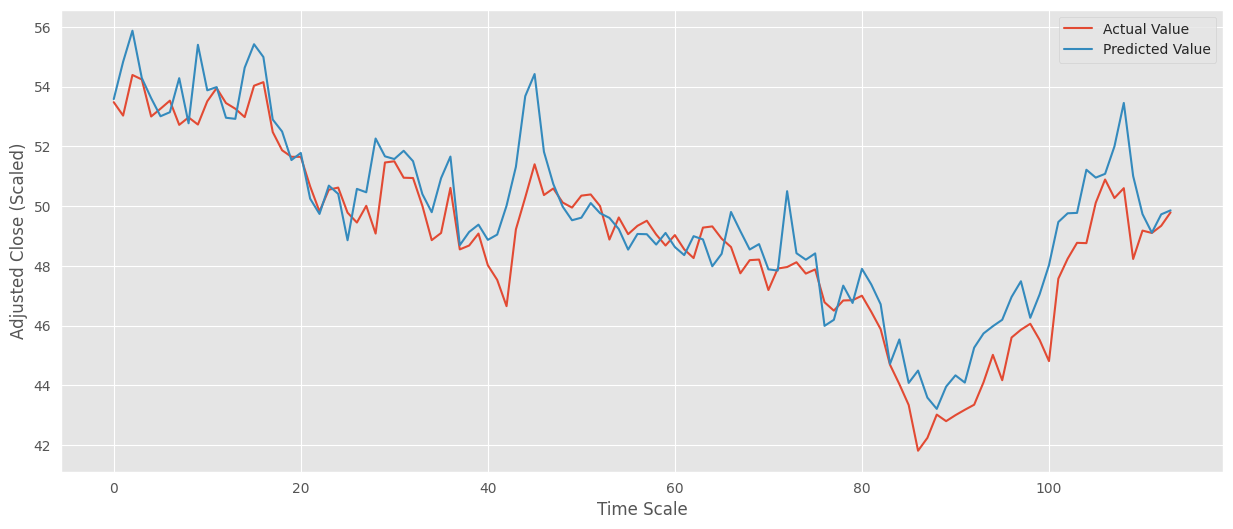

In [24]:
plt.figure(figsize=(15, 6))
plt.plot(y_test.values, label='Actual Value')
plt.plot(y_pred, label='Predicted Value')
plt.ylabel('Adjusted Close (Scaled)')
plt.xlabel('Time Scale')
plt.legend()